In [1]:
import pandas as pd
import numpy as np
from csdmpy.data.ssda903 import SSDA903TableType
from csdmpy.datacontainer import DemandModellingDataContainer
import csdmpy_fakedata as sample
import csdmpy.timeseries as ts
import csdmpy.populations as pop
import csdmpy.constants as C
import csdmpy.transitions as trans
from csdmpy.constants import AgeBracket, PlacementCategory, PlacementType
from csdmpy.population_stats import *
from csdmpy.prediction import *

In [2]:
history_start, reference_start, reference_end, history_end, prediction_end = pd.to_datetime(
    ['2015-01-01', '2019-07-01', '2020-01-01', '2020-01-01', '2021-07-01'])

start_date, end_date = reference_start, reference_end

In [3]:
dc = DemandModellingDataContainer(sample.V1)
df = dc.get_enriched_view()
stats = PopulationStats(df)

In [4]:
fac = ModelFactory(stats, reference_start, reference_end)
predictor = fac.predictor(reference_end)

In [5]:
predictor.start_population

date                                               2020-01-01
age_bin             placement_type                           
BIRTH_TO_ONE        PlacementCategory.FOSTER              0.0
                    PlacementCategory.OTHER               0.0
ONE_TO_FIVE         PlacementCategory.FOSTER              0.0
                    PlacementCategory.OTHER               0.0
FIVE_TO_TEN         PlacementCategory.FOSTER             23.0
                    PlacementCategory.RESIDENTIAL         3.0
                    PlacementCategory.OTHER               0.0
TEN_TO_SIXTEEN      PlacementCategory.FOSTER            130.0
                    PlacementCategory.RESIDENTIAL        31.0
                    PlacementCategory.OTHER              23.0
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER              9.0
                    PlacementCategory.RESIDENTIAL         1.0
                    PlacementCategory.SUPPORTED          14.0
                    PlacementCategory.OTHER               7.0

In [6]:
stats.ageing_probs

age_bin              placement_type               
BIRTH_TO_ONE         PlacementCategory.FOSTER         0.001370
                     PlacementCategory.OTHER          0.001370
ONE_TO_FIVE          PlacementCategory.FOSTER         0.000685
                     PlacementCategory.OTHER          0.000685
FIVE_TO_TEN          PlacementCategory.FOSTER         0.000548
                     PlacementCategory.RESIDENTIAL    0.000548
                     PlacementCategory.OTHER          0.000548
TEN_TO_SIXTEEN       PlacementCategory.FOSTER         0.000457
                     PlacementCategory.RESIDENTIAL    0.000457
                     PlacementCategory.OTHER          0.000457
SIXTEEN_TO_EIGHTEEN  PlacementCategory.FOSTER         0.001370
                     PlacementCategory.RESIDENTIAL    0.001370
                     PlacementCategory.SUPPORTED      0.001370
                     PlacementCategory.OTHER          0.001370
Name: ageing_out, dtype: float64

In [7]:
predictor.current

date                                               2020-01-01
age_bin             placement_type                           
BIRTH_TO_ONE        PlacementCategory.FOSTER              0.0
                    PlacementCategory.OTHER               0.0
ONE_TO_FIVE         PlacementCategory.FOSTER              0.0
                    PlacementCategory.OTHER               0.0
FIVE_TO_TEN         PlacementCategory.FOSTER             23.0
                    PlacementCategory.RESIDENTIAL         3.0
                    PlacementCategory.OTHER               0.0
TEN_TO_SIXTEEN      PlacementCategory.FOSTER            130.0
                    PlacementCategory.RESIDENTIAL        31.0
                    PlacementCategory.OTHER              23.0
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER              9.0
                    PlacementCategory.RESIDENTIAL         1.0
                    PlacementCategory.SUPPORTED          14.0
                    PlacementCategory.OTHER               7.0

In [8]:
predictor.aged_out

date,age_bin,placement_type,2020-01-01 00:00:00,prob,aged_out,next_age_bin
0,BIRTH_TO_ONE,PlacementCategory.FOSTER,0.0,0.001370,0.000000,ONE_TO_FIVE
1,BIRTH_TO_ONE,PlacementCategory.OTHER,0.0,0.001370,0.000000,ONE_TO_FIVE
2,ONE_TO_FIVE,PlacementCategory.FOSTER,0.0,0.000685,0.000000,FIVE_TO_TEN
3,ONE_TO_FIVE,PlacementCategory.OTHER,0.0,0.000685,0.000000,FIVE_TO_TEN
4,FIVE_TO_TEN,PlacementCategory.FOSTER,23.0,0.000548,0.012603,TEN_TO_SIXTEEN
5,FIVE_TO_TEN,PlacementCategory.RESIDENTIAL,3.0,0.000548,0.001644,TEN_TO_SIXTEEN
6,FIVE_TO_TEN,PlacementCategory.OTHER,0.0,0.000548,0.000000,TEN_TO_SIXTEEN
7,TEN_TO_SIXTEEN,PlacementCategory.FOSTER,130.0,0.000457,0.059361,SIXTEEN_TO_EIGHTEEN
8,TEN_TO_SIXTEEN,PlacementCategory.RESIDENTIAL,31.0,0.000457,0.014155,SIXTEEN_TO_EIGHTEEN
9,TEN_TO_SIXTEEN,PlacementCategory.OTHER,23.0,0.000457,0.010502,SIXTEEN_TO_EIGHTEEN


In [9]:
predictor.aged_out

date,age_bin,placement_type,2020-01-01 00:00:00,prob,aged_out,next_age_bin
0,BIRTH_TO_ONE,PlacementCategory.FOSTER,0.0,0.001370,0.000000,ONE_TO_FIVE
1,BIRTH_TO_ONE,PlacementCategory.OTHER,0.0,0.001370,0.000000,ONE_TO_FIVE
2,ONE_TO_FIVE,PlacementCategory.FOSTER,0.0,0.000685,0.000000,FIVE_TO_TEN
3,ONE_TO_FIVE,PlacementCategory.OTHER,0.0,0.000685,0.000000,FIVE_TO_TEN
4,FIVE_TO_TEN,PlacementCategory.FOSTER,23.0,0.000548,0.012603,TEN_TO_SIXTEEN
5,FIVE_TO_TEN,PlacementCategory.RESIDENTIAL,3.0,0.000548,0.001644,TEN_TO_SIXTEEN
6,FIVE_TO_TEN,PlacementCategory.OTHER,0.0,0.000548,0.000000,TEN_TO_SIXTEEN
7,TEN_TO_SIXTEEN,PlacementCategory.FOSTER,130.0,0.000457,0.059361,SIXTEEN_TO_EIGHTEEN
8,TEN_TO_SIXTEEN,PlacementCategory.RESIDENTIAL,31.0,0.000457,0.014155,SIXTEEN_TO_EIGHTEEN
9,TEN_TO_SIXTEEN,PlacementCategory.OTHER,23.0,0.000457,0.010502,SIXTEEN_TO_EIGHTEEN


In [10]:
predictor.aged_out

date,age_bin,placement_type,2020-01-01 00:00:00,prob,aged_out,next_age_bin
0,BIRTH_TO_ONE,PlacementCategory.FOSTER,0.0,0.001370,0.000000,ONE_TO_FIVE
1,BIRTH_TO_ONE,PlacementCategory.OTHER,0.0,0.001370,0.000000,ONE_TO_FIVE
2,ONE_TO_FIVE,PlacementCategory.FOSTER,0.0,0.000685,0.000000,FIVE_TO_TEN
3,ONE_TO_FIVE,PlacementCategory.OTHER,0.0,0.000685,0.000000,FIVE_TO_TEN
4,FIVE_TO_TEN,PlacementCategory.FOSTER,23.0,0.000548,0.012603,TEN_TO_SIXTEEN
5,FIVE_TO_TEN,PlacementCategory.RESIDENTIAL,3.0,0.000548,0.001644,TEN_TO_SIXTEEN
6,FIVE_TO_TEN,PlacementCategory.OTHER,0.0,0.000548,0.000000,TEN_TO_SIXTEEN
7,TEN_TO_SIXTEEN,PlacementCategory.FOSTER,130.0,0.000457,0.059361,SIXTEEN_TO_EIGHTEEN
8,TEN_TO_SIXTEEN,PlacementCategory.RESIDENTIAL,31.0,0.000457,0.014155,SIXTEEN_TO_EIGHTEEN
9,TEN_TO_SIXTEEN,PlacementCategory.OTHER,23.0,0.000457,0.010502,SIXTEEN_TO_EIGHTEEN


In [25]:
leaving = predictor.aged_out.set_index(['age_bin', 'placement_type']).aged_out
# leaving = pd.DataFrame(leaving)
leaving

aged_out
age_bin             placement_type                         
BIRTH_TO_ONE        PlacementCategory.FOSTER       0.000000
                    PlacementCategory.OTHER        0.000000
ONE_TO_FIVE         PlacementCategory.FOSTER       0.000000
                    PlacementCategory.OTHER        0.000000
FIVE_TO_TEN         PlacementCategory.FOSTER       0.012603
                    PlacementCategory.RESIDENTIAL  0.001644
                    PlacementCategory.OTHER        0.000000
TEN_TO_SIXTEEN      PlacementCategory.FOSTER       0.059361
                    PlacementCategory.RESIDENTIAL  0.014155
                    PlacementCategory.OTHER        0.010502
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER       0.012329
                    PlacementCategory.RESIDENTIAL  0.001370
                    PlacementCategory.SUPPORTED    0.019178
                    PlacementCategory.OTHER        0.009589

In [33]:
# c, l = predictor.current.align(leaving, axis=1)
c = predictor.current.copy(deep=False)
c['aged_out'] = leaving
c['adjusted'] = c.iloc[:, 0] - c.aged_out
c

date                                               2020-01-01 00:00:00  \
age_bin             placement_type                                       
BIRTH_TO_ONE        PlacementCategory.FOSTER                       0.0   
                    PlacementCategory.OTHER                        0.0   
ONE_TO_FIVE         PlacementCategory.FOSTER                       0.0   
                    PlacementCategory.OTHER                        0.0   
FIVE_TO_TEN         PlacementCategory.FOSTER                      23.0   
                    PlacementCategory.RESIDENTIAL                  3.0   
                    PlacementCategory.OTHER                        0.0   
TEN_TO_SIXTEEN      PlacementCategory.FOSTER                     130.0   
                    PlacementCategory.RESIDENTIAL                 31.0   
                    PlacementCategory.OTHER                       23.0   
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER                       9.0   
                    PlacementCategory.RESIDENTIAL                  1.0   
                    PlacementCategory.SUPPORTED                   14.0   
                    PlacementCategory.OTHER                        7.0   

date                                               aged_out    adjusted  
age_bin             placement_type                                       
BIRTH_TO_ONE        PlacementCategory.FOSTER       0.000000    0.000000  
                    PlacementCategory.OTHER        0.000000    0.000000  
ONE_TO_FIVE         PlacementCategory.FOSTER       0.000000    0.000000  
                    PlacementCategory.OTHER        0.000000    0.000000  
FIVE_TO_TEN         PlacementCategory.FOSTER       0.012603   22.987397  
                    PlacementCategory.RESIDENTIAL  0.001644    2.998356  
                    PlacementCategory.OTHER        0.000000    0.000000  
TEN_TO_SIXTEEN      PlacementCategory.FOSTER       0.059361  129.940639  
                    PlacementCategory.RESIDENTIAL  0.014155   30.985845  
                    PlacementCategory.OTHER        0.010502   22.989498  
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER       0.012329    8.987671  
                    PlacementCategory.RESIDENTIAL  0.001370    0.998630  
                    PlacementCategory.SUPPORTED    0.019178   13.980822  
                    PlacementCategory.OTHER        0.009589    6.990411

In [34]:
arriving = predictor.aged_out.dropna().set_index(['next_age_bin', 'placement_type']).aged_out
arriving.index.names=['age_bin', 'placement_type']
arriving

age_bin              placement_type               
ONE_TO_FIVE          PlacementCategory.FOSTER         0.000000
                     PlacementCategory.OTHER          0.000000
FIVE_TO_TEN          PlacementCategory.FOSTER         0.000000
                     PlacementCategory.OTHER          0.000000
TEN_TO_SIXTEEN       PlacementCategory.FOSTER         0.012603
                     PlacementCategory.RESIDENTIAL    0.001644
                     PlacementCategory.OTHER          0.000000
SIXTEEN_TO_EIGHTEEN  PlacementCategory.FOSTER         0.059361
                     PlacementCategory.RESIDENTIAL    0.014155
                     PlacementCategory.OTHER          0.010502
Name: aged_out, dtype: float64

In [39]:
a = predictor.current.copy(deep=False)
a['aged_in'] = arriving
a = a.fillna(0)
a['adjusted'] = a.iloc[:, 0] + a.aged_in
a

date                                               2020-01-01 00:00:00  \
age_bin             placement_type                                       
BIRTH_TO_ONE        PlacementCategory.FOSTER                       0.0   
                    PlacementCategory.OTHER                        0.0   
ONE_TO_FIVE         PlacementCategory.FOSTER                       0.0   
                    PlacementCategory.OTHER                        0.0   
FIVE_TO_TEN         PlacementCategory.FOSTER                      23.0   
                    PlacementCategory.RESIDENTIAL                  3.0   
                    PlacementCategory.OTHER                        0.0   
TEN_TO_SIXTEEN      PlacementCategory.FOSTER                     130.0   
                    PlacementCategory.RESIDENTIAL                 31.0   
                    PlacementCategory.OTHER                       23.0   
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER                       9.0   
                    PlacementCategory.RESIDENTIAL                  1.0   
                    PlacementCategory.SUPPORTED                   14.0   
                    PlacementCategory.OTHER                        7.0   

date                                                aged_in    adjusted  
age_bin             placement_type                                       
BIRTH_TO_ONE        PlacementCategory.FOSTER       0.000000    0.000000  
                    PlacementCategory.OTHER        0.000000    0.000000  
ONE_TO_FIVE         PlacementCategory.FOSTER       0.000000    0.000000  
                    PlacementCategory.OTHER        0.000000    0.000000  
FIVE_TO_TEN         PlacementCategory.FOSTER       0.000000   23.000000  
                    PlacementCategory.RESIDENTIAL  0.000000    3.000000  
                    PlacementCategory.OTHER        0.000000    0.000000  
TEN_TO_SIXTEEN      PlacementCategory.FOSTER       0.012603  130.012603  
                    PlacementCategory.RESIDENTIAL  0.001644   31.001644  
                    PlacementCategory.OTHER        0.000000   23.000000  
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER       0.059361    9.059361  
                    PlacementCategory.RESIDENTIAL  0.014155    1.014155  
                    PlacementCategory.SUPPORTED    0.000000   14.000000  
                    PlacementCategory.OTHER        0.010502    7.010502

In [51]:
p = predictor.temp_adjust_population()
p

date                                               2020-01-01 00:00:00  \
age_bin             placement_type                                       
BIRTH_TO_ONE        PlacementCategory.FOSTER                       0.0   
                    PlacementCategory.OTHER                        0.0   
ONE_TO_FIVE         PlacementCategory.FOSTER                       0.0   
                    PlacementCategory.OTHER                        0.0   
FIVE_TO_TEN         PlacementCategory.FOSTER                      23.0   
                    PlacementCategory.RESIDENTIAL                  3.0   
                    PlacementCategory.OTHER                        0.0   
TEN_TO_SIXTEEN      PlacementCategory.FOSTER                     130.0   
                    PlacementCategory.RESIDENTIAL                 31.0   
                    PlacementCategory.OTHER                       23.0   
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER                       9.0   
                    PlacementCategory.RESIDENTIAL                  1.0   
                    PlacementCategory.SUPPORTED                   14.0   
                    PlacementCategory.OTHER                        7.0   

date                                               aged_out   aged_in  \
age_bin             placement_type                                      
BIRTH_TO_ONE        PlacementCategory.FOSTER       0.000000  0.000000   
                    PlacementCategory.OTHER        0.000000  0.000000   
ONE_TO_FIVE         PlacementCategory.FOSTER       0.000000  0.000000   
                    PlacementCategory.OTHER        0.000000  0.000000   
FIVE_TO_TEN         PlacementCategory.FOSTER       0.012603  0.000000   
                    PlacementCategory.RESIDENTIAL  0.001644  0.000000   
                    PlacementCategory.OTHER        0.000000  0.000000   
TEN_TO_SIXTEEN      PlacementCategory.FOSTER       0.059361  0.012603   
                    PlacementCategory.RESIDENTIAL  0.014155  0.001644   
                    PlacementCategory.OTHER        0.010502  0.000000   
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER       0.012329  0.059361   
                    PlacementCategory.RESIDENTIAL  0.001370  0.014155   
                    PlacementCategory.SUPPORTED    0.019178  0.000000   
                    PlacementCategory.OTHER        0.009589  0.010502   

date                                                 adjusted  
age_bin             placement_type                             
BIRTH_TO_ONE        PlacementCategory.FOSTER         0.000000  
                    PlacementCategory.OTHER          0.000000  
ONE_TO_FIVE         PlacementCategory.FOSTER         0.000000  
                    PlacementCategory.OTHER          0.000000  
FIVE_TO_TEN         PlacementCategory.FOSTER        22.987397  
                    PlacementCategory.RESIDENTIAL    2.998356  
                    PlacementCategory.OTHER          0.000000  
TEN_TO_SIXTEEN      PlacementCategory.FOSTER       129.953242  
                    PlacementCategory.RESIDENTIAL   30.987489  
                    PlacementCategory.OTHER         22.989498  
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER         9.047032  
                    PlacementCategory.RESIDENTIAL    1.012785  
                    PlacementCategory.SUPPORTED     13.980822  
                    PlacementCategory.OTHER          7.000913

In [66]:
trans = stats.transition_rates(start_date, end_date).unstack().fillna(0).multiply(p.adjusted, axis="index")
trans

placement_type_after                               PlacementCategory.FOSTER  \
age_bin             placement_type                                            
BIRTH_TO_ONE        PlacementCategory.FOSTER                       0.000000   
                    PlacementCategory.OTHER                        0.000000   
ONE_TO_FIVE         PlacementCategory.FOSTER                       0.000000   
                    PlacementCategory.OTHER                        0.000000   
FIVE_TO_TEN         PlacementCategory.FOSTER                      22.962905   
                    PlacementCategory.RESIDENTIAL                  0.000000   
                    PlacementCategory.OTHER                        0.000000   
TEN_TO_SIXTEEN      PlacementCategory.FOSTER                     129.640893   
                    PlacementCategory.RESIDENTIAL                  0.025124   
                    PlacementCategory.OTHER                        0.005918   
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER                       9.028499   
                    PlacementCategory.RESIDENTIAL                  0.000000   
                    PlacementCategory.SUPPORTED                    0.005038   
                    PlacementCategory.OTHER                        0.000000   

placement_type_after                               PlacementCategory.OTHER  \
age_bin             placement_type                                           
BIRTH_TO_ONE        PlacementCategory.FOSTER                      0.000000   
                    PlacementCategory.OTHER                       0.000000   
ONE_TO_FIVE         PlacementCategory.FOSTER                      0.000000   
                    PlacementCategory.OTHER                       0.000000   
FIVE_TO_TEN         PlacementCategory.FOSTER                      0.004142   
                    PlacementCategory.RESIDENTIAL                 0.000000   
                    PlacementCategory.OTHER                       0.000000   
TEN_TO_SIXTEEN      PlacementCategory.FOSTER                      0.051442   
                    PlacementCategory.RESIDENTIAL                 0.000000   
                    PlacementCategory.OTHER                      22.941808   
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER                      0.000000   
                    PlacementCategory.RESIDENTIAL                 0.000000   
                    PlacementCategory.SUPPORTED                   0.005038   
                    PlacementCategory.OTHER                       6.982367   

placement_type_after                               PlacementCategory.RESIDENTIAL  \
age_bin             placement_type                                                 
BIRTH_TO_ONE        PlacementCategory.FOSTER                            0.000000   
                    PlacementCategory.OTHER                             0.000000   
ONE_TO_FIVE         PlacementCategory.FOSTER                            0.000000   
                    PlacementCategory.OTHER                             0.000000   
FIVE_TO_TEN         PlacementCategory.FOSTER                            0.006217   
                    PlacementCategory.RESIDENTIAL                       2.994304   
                    PlacementCategory.OTHER                             0.000000   
TEN_TO_SIXTEEN      PlacementCategory.FOSTER                            0.048856   
                    PlacementCategory.RESIDENTIAL                      30.931805   
                    PlacementCategory.OTHER                             0.006213   
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER                            0.000000   
                    PlacementCategory.RESIDENTIAL                       0.981136   
                    PlacementCategory.SUPPORTED                         0.000000   
                    PlacementCategory.OTHER                             0.000000   

placement_type_after                               PlacementCategory.SUPPORTED  
age_bin             placement_type                          

These are transitions numbers for each category. So for each age bracked, sum down to find out what the new populations are.

In [73]:
trans.reset_index().groupby('age_bin').sum().stack()

age_bin              placement_type_after         
BIRTH_TO_ONE         PlacementCategory.FOSTER           0.000000
                     PlacementCategory.OTHER            0.000000
                     PlacementCategory.RESIDENTIAL      0.000000
                     PlacementCategory.SUPPORTED        0.000000
ONE_TO_FIVE          PlacementCategory.FOSTER           0.000000
                     PlacementCategory.OTHER            0.000000
                     PlacementCategory.RESIDENTIAL      0.000000
                     PlacementCategory.SUPPORTED        0.000000
FIVE_TO_TEN          PlacementCategory.FOSTER          22.962905
                     PlacementCategory.OTHER            0.004142
                     PlacementCategory.RESIDENTIAL      3.000521
                     PlacementCategory.SUPPORTED        0.000000
TEN_TO_SIXTEEN       PlacementCategory.FOSTER         129.671935
                     PlacementCategory.OTHER           22.993250
                     PlacementCategory.

In [171]:
s = predictor.temp_age_population().adjusted
s

age_bin              placement_type               
BIRTH_TO_ONE         PlacementCategory.FOSTER           0.000000
                     PlacementCategory.OTHER            0.000000
ONE_TO_FIVE          PlacementCategory.FOSTER           0.000000
                     PlacementCategory.OTHER            0.000000
FIVE_TO_TEN          PlacementCategory.FOSTER          22.987397
                     PlacementCategory.RESIDENTIAL      2.998356
                     PlacementCategory.OTHER            0.000000
TEN_TO_SIXTEEN       PlacementCategory.FOSTER         129.953242
                     PlacementCategory.RESIDENTIAL     30.987489
                     PlacementCategory.OTHER           22.989498
SIXTEEN_TO_EIGHTEEN  PlacementCategory.FOSTER           9.047032
                     PlacementCategory.RESIDENTIAL      1.012785
                     PlacementCategory.SUPPORTED       13.980822
                     PlacementCategory.OTHER            7.000913
Name: adjusted, dtype: float64

In [179]:
s = predictor.temp_transition_population(s)
s

age_bin              placement_type               
BIRTH_TO_ONE         PlacementCategory.FOSTER           0.000000
                     PlacementCategory.OTHER            0.000000
                     PlacementCategory.RESIDENTIAL      0.000000
                     PlacementCategory.SUPPORTED        0.000000
ONE_TO_FIVE          PlacementCategory.FOSTER           0.000000
                     PlacementCategory.OTHER            0.000000
                     PlacementCategory.RESIDENTIAL      0.000000
                     PlacementCategory.SUPPORTED        0.000000
FIVE_TO_TEN          PlacementCategory.FOSTER          22.792190
                     PlacementCategory.OTHER            0.033012
                     PlacementCategory.RESIDENTIAL      3.015409
                     PlacementCategory.SUPPORTED        0.000000
TEN_TO_SIXTEEN       PlacementCategory.FOSTER         127.721630
                     PlacementCategory.OTHER           23.016209
                     PlacementCategory.

date                                               2020-01-01 00:00:00  \
age_bin             placement_type                                       
BIRTH_TO_ONE        PlacementCategory.FOSTER                       0.0   
                    PlacementCategory.OTHER                        0.0   
ONE_TO_FIVE         PlacementCategory.FOSTER                       0.0   
                    PlacementCategory.OTHER                        0.0   
FIVE_TO_TEN         PlacementCategory.FOSTER                      23.0   
                    PlacementCategory.RESIDENTIAL                  3.0   
                    PlacementCategory.OTHER                        0.0   
TEN_TO_SIXTEEN      PlacementCategory.FOSTER                     130.0   
                    PlacementCategory.RESIDENTIAL                 31.0   
                    PlacementCategory.OTHER                       23.0   
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER                       9.0   
                    PlacementCategory.RESIDENTIAL                  1.0   
                    PlacementCategory.SUPPORTED                   14.0   
                    PlacementCategory.OTHER                        7.0   

date                                               aged_out   aged_in  \
age_bin             placement_type                                      
BIRTH_TO_ONE        PlacementCategory.FOSTER       0.000000  0.000000   
                    PlacementCategory.OTHER        0.000000  0.000000   
ONE_TO_FIVE         PlacementCategory.FOSTER       0.000000  0.000000   
                    PlacementCategory.OTHER        0.000000  0.000000   
FIVE_TO_TEN         PlacementCategory.FOSTER       0.012603  0.000000   
                    PlacementCategory.RESIDENTIAL  0.001644  0.000000   
                    PlacementCategory.OTHER        0.000000  0.000000   
TEN_TO_SIXTEEN      PlacementCategory.FOSTER       0.059361  0.012603   
                    PlacementCategory.RESIDENTIAL  0.014155  0.001644   
                    PlacementCategory.OTHER        0.010502  0.000000   
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER       0.012329  0.059361   
                    PlacementCategory.RESIDENTIAL  0.001370  0.014155   
                    PlacementCategory.SUPPORTED    0.019178  0.000000   
                    PlacementCategory.OTHER        0.009589  0.010502   

date                                                 adjusted  
age_bin             placement_type                             
BIRTH_TO_ONE        PlacementCategory.FOSTER         0.000000  
                    PlacementCategory.OTHER          0.000000  
ONE_TO_FIVE         PlacementCategory.FOSTER         0.000000  
                    PlacementCategory.OTHER          0.000000  
FIVE_TO_TEN         PlacementCategory.FOSTER        22.987397  
                    PlacementCategory.RESIDENTIAL    2.998356  
                    PlacementCategory.OTHER          0.000000  
TEN_TO_SIXTEEN      PlacementCategory.FOSTER       129.953242  
                    PlacementCategory.RESIDENTIAL   30.987489  
                    PlacementCategory.OTHER         22.989498  
SIXTEEN_TO_EIGHTEEN PlacementCategory.FOSTER         9.047032  
                    PlacementCategory.RESIDENTIAL    1.012785  
                    PlacementCategory.SUPPORTED     13.980822  
                    PlacementCategory.OTHER          7.000913

age_bin              placement_type               
BIRTH_TO_ONE         PlacementCategory.FOSTER           0.0
                     PlacementCategory.OTHER            0.0
ONE_TO_FIVE          PlacementCategory.FOSTER           0.0
                     PlacementCategory.OTHER            0.0
FIVE_TO_TEN          PlacementCategory.FOSTER          23.0
                     PlacementCategory.RESIDENTIAL      3.0
                     PlacementCategory.OTHER            0.0
TEN_TO_SIXTEEN       PlacementCategory.FOSTER         130.0
                     PlacementCategory.RESIDENTIAL     31.0
                     PlacementCategory.OTHER           23.0
SIXTEEN_TO_EIGHTEEN  PlacementCategory.FOSTER           9.0
                     PlacementCategory.RESIDENTIAL      1.0
                     PlacementCategory.SUPPORTED       14.0
                     PlacementCategory.OTHER            7.0
Name: 2020-01-01 00:00:00, dtype: float64

age_bin         placement_type          
FIVE_TO_TEN     PlacementCategory.FOSTER    0.005435
TEN_TO_SIXTEEN  PlacementCategory.FOSTER    0.021739
Name: daily_entry_probability, dtype: float64

age_bin              placement_type               
BIRTH_TO_ONE         PlacementCategory.FOSTER           0.000000
                     PlacementCategory.OTHER            0.000000
ONE_TO_FIVE          PlacementCategory.FOSTER           0.000000
                     PlacementCategory.OTHER            0.000000
FIVE_TO_TEN          PlacementCategory.FOSTER          23.038043
                     PlacementCategory.RESIDENTIAL      3.000000
                     PlacementCategory.OTHER            0.000000
TEN_TO_SIXTEEN       PlacementCategory.FOSTER         130.152174
                     PlacementCategory.RESIDENTIAL     31.000000
                     PlacementCategory.OTHER           23.000000
SIXTEEN_TO_EIGHTEEN  PlacementCategory.FOSTER           9.000000
                     PlacementCategory.RESIDENTIAL      1.000000
                     PlacementCategory.SUPPORTED       14.000000
                     PlacementCategory.OTHER            7.000000
dtype: float64

In [235]:
future_pop = predictor.predict(720)

In [239]:
future_pop =
future_pop

age_bin                    BIRTH_TO_ONE                          \
placement_type PlacementCategory.FOSTER PlacementCategory.OTHER   
2020-01-02                          0.0                     0.0   
2020-01-03                          0.0                     0.0   
2020-01-04                          0.0                     0.0   
2020-01-05                          0.0                     0.0   
2020-01-06                          0.0                     0.0   
...                                 ...                     ...   
2021-12-17                          0.0                     0.0   
2021-12-18                          0.0                     0.0   
2021-12-19                          0.0                     0.0   
2021-12-20                          0.0                     0.0   
2021-12-21                          0.0                     0.0   

age_bin                                                                   \
placement_type PlacementCategory.RESIDENTIAL PlacementCategory.SUPPORTED   
2020-01-02                               0.0                         0.0   
2020-01-03                               0.0                         0.0   
2020-01-04                               0.0                         0.0   
2020-01-05                               0.0                         0.0   
2020-01-06                               0.0                         0.0   
...                                      ...                         ...   
2021-12-17                               0.0                         0.0   
2021-12-18                               0.0                         0.0   
2021-12-19                               0.0                         0.0   
2021-12-20                               0.0                         0.0   
2021-12-21                               0.0                         0.0   

age_bin                     ONE_TO_FIVE                          \
placement_type PlacementCategory.FOSTER PlacementCategory.OTHER   
2020-01-02                          0.0                     0.0   
2020-01-03                          0.0                     0.0   
2020-01-04                          0.0                     0.0   
2020-01-05                          0.0                     0.0   
2020-01-06                          0.0                     0.0   
...                                 ...                     ...   
2021-12-17                          0.0                     0.0   
2021-12-18                          0.0                     0.0   
2021-12-19                          0.0                     0.0   
2021-12-20                          0.0                     0.0   
2021-12-21                          0.0                     0.0   

age_bin                                                                   \
placement_type PlacementCategory.RESIDENTIAL PlacementCategory.SUPPORTED   
2020-01-02                               0.0                         0.0   
2020-01-03                               0.0                         0.0   
2020-01-04                               0.0                         0.0   
2020-01-05                               0.0                         0.0   
2020-01-06                               0.0                         0.0   
...                                      ...                         ...   
2021-12-17                               0.0                         0.0   
2021-12-18                               0.0                         0.0   
2021-12-19                               0.0                         0.0   
2021-12-20                               0.0                         0.0   
2021-12-21                               0.0                         0.0   

age_bin                     FIVE_TO_TEN                          \
placement_type PlacementCategory.FOSTER PlacementCategory.OTHER   
2020-01-02                    22.968340                0.004142   
2020-01-03                    22.936714                0.008278   
2020-01-04

<AxesSubplot:xlabel='date'>

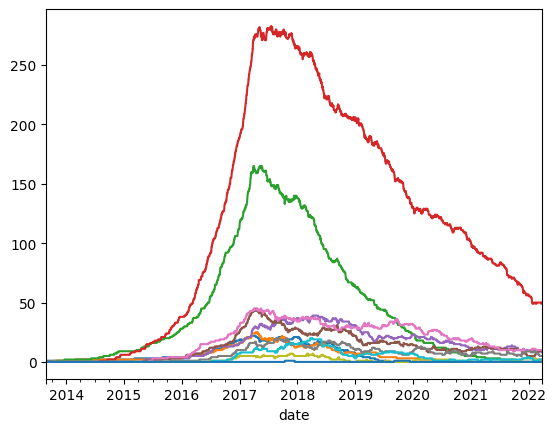

In [244]:
stats.stock.plot(legend=False)

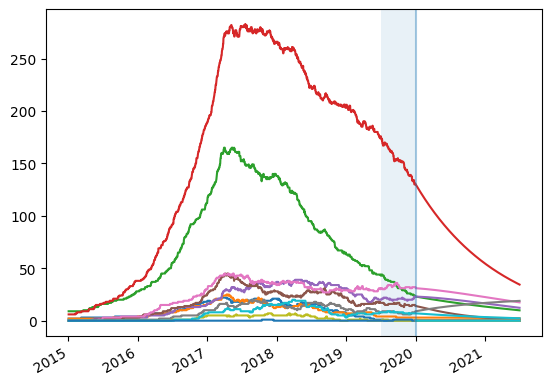

In [257]:
import matplotlib.pyplot as pp

pd.concat([stats.stock[(stats.stock.index < end_date) & (stats.stock.index > history_start)], future_pop[future_pop.index < prediction_end]], axis=0).plot(legend=False)
pp.axvline(history_end, alpha=0.4)
pp.axvspan(reference_start, reference_end, alpha=0.1)
pp.show()